# Multiagent Systems in Python

Auteur : Philippe Mathieu, [CRISTAL Lab](https://www.cristal.univ-lille.fr/), [SMAC Team](https://www.cristal.univ-lille.fr/?rubrique26&id=7), [University of Lille](http://www.univ-lille1.fr), email : philippe.mathieu@univ-lille.fr

Contributeurs : Nicolas Mauhé (CRISTAL/SMAC)

Creation : 18/01/2018


## Principe général

Les Systèmes multi-agents (SMA) sont des systèmes dans lequel des entités dotées de leur propre comportement, intéragissent entre-elles. Cette approche de modélisation répond à quatre grandes familles de problèmes :
- le fait que certains problèmes mettent obligatoirement en oeuvre différentes entités dotées de comportements (c'est le cas des simulateurs sociaux comme les simulateurs de marchés financiers, les simulateurs de trafic routier ou les simulateurs agricoles)
- Le fait que à plusieurs, les choses vont plus vite (c'est le cas des applications de type problèmes de patrouilles, de surveillance de bâtiments etc ..)
- le fait que les systèmes sont parfois physiquement distribués dans lesquels des logiciels/matériels sur des machines différentes doivent collaborer (résolution de problèmes, applications collaboratives sur smartphones, calculs distribués, reseaux sociaux)
- L'étude des systèmes complexes : systèmes avec plusieurs entités qui interagissent, avec en général des boucles de rétro-actions, et dans lesquels des propriétés émergentes apparaissent (turmites, théorie des jeux, etc ...)

Il est possible de représenter des agents dans tous les langages, mais
les langages objets sont sans aucun doute les plus proches de la
philosophie "Agent". Un SMA s'écrit donc très facilement à partir d'un
langage à objets. Parmi ces langages, Python apporte la concision dans le code. l'objectif de cette page Jupyter n'est pas de fournir un SMA sophistiqué, mais de montrer les bases de sa conception en quelques lignes.

## L'agent

Dans sa forme la plus simple, un agent est une entité dotée d'une seule
capacité, celle de décider quoi faire. Personne ne lui indique ce qu'il doit faire,
c'est lui qui décide ! C'est le principe d'**autonomie**. Il suffit juste de lui donner la
parole pour qu'il agisse. Lors de sa prise de parole, l'agent réalise sémantiquement 3 étapes différentes : la **perception** de son entourage, la **decision** en fonction de son propre état et de ce qu'il a perçu, puis l'**action** effective qu'il réalise in fine. Idéalement chaque agent ne peut faire qu'une seule action lors de sa prise de parole.

In [123]:
class Agent:
    def __init__(self,name) :
        self.name=name

    def decide(self):
        print("Hello ! My name is "+self.name)

Il est bien sûr possible de créer plusieurs agents et de les interroger directement.

In [124]:
a1 = Agent("philippe")
a2 = Agent("antoine")
a1.decide()
a2.decide()

Hello ! My name is philippe
Hello ! My name is antoine


## Le système multiagent

Bien évidemment, un système multi-agent utilise des dizaines voire des
milliers d'agents. Il est alors necessaire de créer une classe
permettant de les manager. En général la méthode qui lance la
simulation se nomme `run` et prend en paramètre le nombre de prises de
paroles.


In [125]:
import random
class SMA:

    def __init__(self):
        self.agentList = []

    def addAgent(self,ag):
        self.agentList.append(ag)

    def run(self,ticks):
        for i in range(ticks):
            random.choice(self.agentList).decide()


In [126]:
sma = SMA()
sma.addAgent(Agent("paul"))
sma.addAgent(Agent("kim"))
sma.run(6)

Hello ! My name is paul
Hello ! My name is kim
Hello ! My name is kim
Hello ! My name is paul
Hello ! My name is paul
Hello ! My name is paul


## Un système équitable

La méthode précédente, triviale,  est discutable. Elle donne au hasard la parole
à un agent, et, de ce fait, risque d'en avantager certains. Elle n'est
pas équitable. Il est plus judiscieux de s'assurer que chaque agent ait
au moins une fois la parole avant qu'un autre agent ne l'ait deux
fois. On introduit alors la notion de tour de parole. Chaque tour de
parole donne aléatoirement la parole à l'ensemble des agents, avant de
recommencer. Un tour de parole constitue sémantiquement une unité de temps, un tick d'horloge. La classe SMA s'écrit alors


In [127]:
import random
class SMA:
      def __init__(self):
        self.resetTicks()
        self.agentList = []

      def resetTicks(self):
        self.tick=0

      def addAgent(self,ag):
        self.agentList.append(ag)

      def run(self,rounds):
          for i in range(0,rounds):
            self.runOnce()

      def runOnce(self):
        self.tick+=1
        random.shuffle(self.agentList)
        for ag in self.agentList :
              ag.decide()
        print("tick "+str(self.tick)+" ended")

In [128]:
sma = SMA()
sma.addAgent(Agent("paul"))
sma.addAgent(Agent("kim"))
sma.addAgent(Agent("Lisa"))
sma.run(5)

Hello ! My name is Lisa
Hello ! My name is paul
Hello ! My name is kim
tick 1 ended
Hello ! My name is paul
Hello ! My name is Lisa
Hello ! My name is kim
tick 2 ended
Hello ! My name is Lisa
Hello ! My name is paul
Hello ! My name is kim
tick 3 ended
Hello ! My name is Lisa
Hello ! My name is kim
Hello ! My name is paul
tick 4 ended
Hello ! My name is kim
Hello ! My name is paul
Hello ! My name is Lisa
tick 5 ended


## La vitesse des agents

Sur un ordinateur, il n'est jamais possible d'accélérer un processus. Le processus tourne à la vitesse optimale. Néanmoins il est possible de le ralentir. Si on souhaite qu'un agent prenne la parole deux fois moins souvent qu'un autre, il lui suffit alors qu'il la refuse une fois sur deux ce qui se réalise avec un simple modulo dans la procédure de décision. Il est alors possible de paramétrer très finement la vitesse de prise de parole de chaque agent et d'obtenir les rapports de vitesses que l'on souhaite entre les agents.

In [129]:
class Agent:
      def __init__(self,name,slowdown) :
            self.name=name
            self.slowdown=slowdown
            self.talk=0

      def decide(self) :
            if (sma.tick % self.slowdown != 0):
                return
            self.talk+=1
            print("Hello. My name is "+self.name+", and this is my "+str(self.talk)+" talk")


In [130]:
sma = SMA()
sma.addAgent(Agent("paul",1))
sma.addAgent(Agent("kim",2))
sma.addAgent(Agent("lisa",3))
sma.run(6)

Hello. My name is paul, and this is my 1 talk
tick 1 ended
Hello. My name is kim, and this is my 1 talk
Hello. My name is paul, and this is my 2 talk
tick 2 ended
Hello. My name is lisa, and this is my 1 talk
Hello. My name is paul, and this is my 3 talk
tick 3 ended
Hello. My name is kim, and this is my 2 talk
Hello. My name is paul, and this is my 4 talk
tick 4 ended
Hello. My name is paul, and this is my 5 talk
tick 5 ended
Hello. My name is paul, and this is my 6 talk
Hello. My name is lisa, and this is my 2 talk
Hello. My name is kim, and this is my 3 talk
tick 6 ended


## Etudier l'émergence
Comme tout outil informatique, le Système Multi Agent (SMA) doit permettre à l'utisateur d'étudier différentes propriétés. Ces propriétés à étudier peuvent être placées au niveau microscopique (c'est  dire au niveau d'un agent, par exemple l'évolution de son bien-être, de sa richesse, de son age ou de sa santé), et/ou au niveau macroscopique (c'est à dire au niveau du SMA comme le nombre d'agents vivants, le chiffre d'affaire d'un magasin, ou le nombre global de messages échangés). Bien sûr, cette observation peut se faire in fine, auquel cas une valeur est renvoyée en fin d'expérience, ou tout au long de l'expérience, amenant alors à des courbes temporelles.

Prenons l'exemple d'agents placés dans un reseau social. Chaque agent possède une liste d'accointances (entre 1 et le nombre total d'agents), formant ainsi un graphe social. A des fins d'expériences, une information (`ball`) est passée d'agent en agent (`has_it`), chacun passant l'information à l'une de ses accointances.

#### Tout d'abord réalisons le SMA et l'agent ...
- Cette fois, c'est le SMA qui crée les agents, dans son constructeur.
- Le SMA aura lors de sa construction le nombre d'agents à créer et une matrice d'adjacence de la taille du nombre d'agents : `SMA(10,matrix)`. lors de cette construction le SMA crée les n agents souhaités en leur passant à tous leur identifiant, ainsi que la liste de leurs accointances
        for i in range(nb_agents):
            self.agentList.append(Agent(i, np.nonzero(adjacency_matrix[i])[0]))
- Un agent aura lors de sa construction son identifiant et sa liste d'accointances : `agent(3,[1,5,7])`

Cette matrice sera créée en externe par l'une des méthodes du package **numpy** bien adapté à cela. Numpy offre notamment de très nombreuses fonctions de manipulation de matrices. [http://www.numpy.org/] click tutorial to have a brief intro.

Dans sa méthode de décision, l'agent regarde s'il a l'information, et si oui, choisit aléatoirement l'un de ses amis dans sa liste pour lui passer.
A des fins d'analyse, chaque agent gère aussi son historique des récupérations de la balle : une simple map qui contient à chaque tick le nombre de fois où il a obtenu la balle : {0:0, 1:0, 2:0, 3:1, 4:1, 5:2, 6:2}


In [131]:
import numpy as np

class SMA:
    def __init__(self, nb_agents, adjacency_matrix):
        self.tick = 0
        self.agentList = []

        # Initialize accointances based on the matrix
        for i in range(nb_agents):
            self.agentList.append(Agent(i, np.nonzero(adjacency_matrix[i])[0]))

    def run(self, rounds):
        for i in range(0,rounds):
            self.runOnce()

    def runOnce(self):
        self.tick += 1
        for agent in self.agentList:
            agent.decide(self.tick)
        print("tick " + str(self.tick) + " ended")

class Agent:
    def __init__(self, id_number, accointances) :
        self.id_number = id_number
        self.accointances = accointances
        self.has_it = False
        self.history = {0: 0}

    def decide(self, tick) :
        # print("agent "+str(self.id_number)+" has the talk")
        if tick not in self.history:
            self.history[tick] = self.history[tick-1]
        if self.has_it:
            chosen = np.random.choice(self.accointances, 1)
            self.has_it = False
            sma.agentList[chosen[0]].has_it = ball
            sma.agentList[chosen[0]].history[tick] = sma.agentList[chosen[0]].history[tick-1] + 1
            print(str(self.id_number) + " gives it to " + str(chosen[0]))

On initialise le système en créant tout d'abord un graphe.
Le package **networkx** regorge de méthodes de création de graphes (on s'assure qu'il soit connexe pour que chaque agent ait au moins une accointance). Il suffit ensuite de les convertir en matrices **numpy** pour les passer au SMA.
Voir [https://networkx.github.io/] click doc to have many examples

In [132]:
import networkx as nx

nb_agents = 16
graph = nx.barabasi_albert_graph(nb_agents, 2)
#graph = nx.complete_graph(nb_agents)
#graph = nx.erdos_renyi_graph(nb_agents,0.1)
#graph = nx.cycle_graph(nb_agents)
#graph = nx.random_regular_graph(3,nb_agents)
matrix = nx.to_numpy_array(graph, nodelist=range(nb_agents))
sma = SMA(nb_agents, matrix)

#### Dessin du  graphe social

La librairie `matplotlib` facilite grandement les représentations graphiques 2D avec sa fonction`plot`.
Plus plus de détails, voir [https://matplotlib.org/users/history.html]

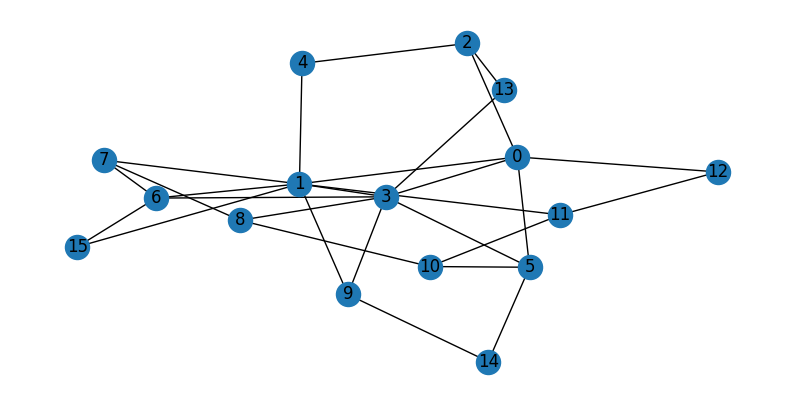

In [133]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))    # pour définir la taille de la figure
nx.draw_networkx(graph)
plt.axis('off')
plt.show()

#### Histogramme des degrés du graphe:

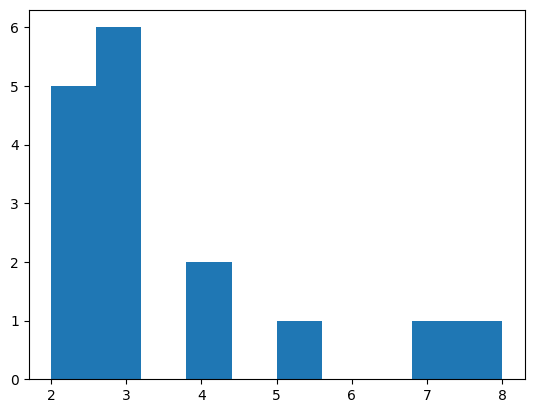

In [134]:
plt.hist(dict(graph.degree()).values())
plt.show()

### Execution du SMA

On donne la balle à un agent au hasard et on lance un certain nombre de tours.

In [135]:
# On donne la balle
ball = "Could be anything."
an_agent = np.random.choice(sma.agentList)
an_agent.has_it = ball
print("Initially, agent "+str(an_agent.id_number)+" has the ball.")
an_agent.history[0] = 1

# On lance le jeu
nb_rounds = 40
sma.run(nb_rounds)

# On reprend la balle, pour une éventuelle réexécution.
for agent in sma.agentList:
    if agent.has_it:
        agent.has_it = False

Initially, agent 1 has the ball.
1 gives it to 9
9 gives it to 3
tick 1 ended
3 gives it to 0
tick 2 ended
0 gives it to 2
2 gives it to 0
tick 3 ended
0 gives it to 12
12 gives it to 0
tick 4 ended
0 gives it to 1
1 gives it to 0
tick 5 ended
0 gives it to 5
5 gives it to 10
10 gives it to 8
tick 6 ended
8 gives it to 3
tick 7 ended
3 gives it to 13
13 gives it to 2
tick 8 ended
2 gives it to 0
tick 9 ended
0 gives it to 2
2 gives it to 4
4 gives it to 1
tick 10 ended
1 gives it to 15
15 gives it to 6
tick 11 ended
6 gives it to 3
tick 12 ended
3 gives it to 9
9 gives it to 3
tick 13 ended
3 gives it to 8
8 gives it to 10
10 gives it to 5
tick 14 ended
5 gives it to 10
10 gives it to 8
tick 15 ended
8 gives it to 3
tick 16 ended
3 gives it to 1
tick 17 ended
1 gives it to 11
11 gives it to 12
12 gives it to 0
tick 18 ended
0 gives it to 2
2 gives it to 4
4 gives it to 2
tick 19 ended
2 gives it to 4
4 gives it to 2
tick 20 ended
2 gives it to 13
13 gives it to 2
tick 21 ended
2 gives 

### Evolution temporelle du nombre de fois où l'agent a eu la balle

Prenons l'exemple de l'agent 8. On trace l'évolution du nombre de fois où cet agent a reçu la balle tout au long de l'expérience

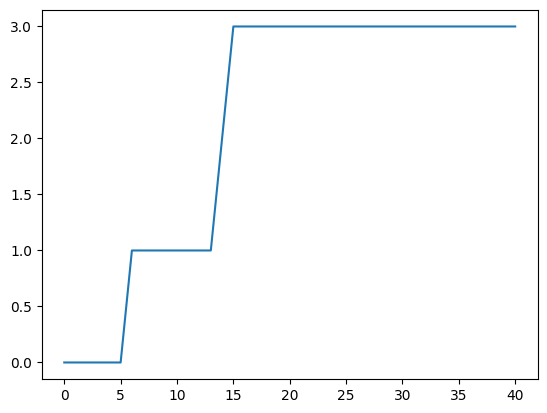

In [136]:
import matplotlib.pyplot as plt

plt.plot(sorted(list(sma.agentList[8].history.values())))
plt.show()

Il est d'ailleurs possible d'afficher l'évolution de tous les agents sur le meme graphe (même si avec beaucoup d'agents cela devient vite illisible) :

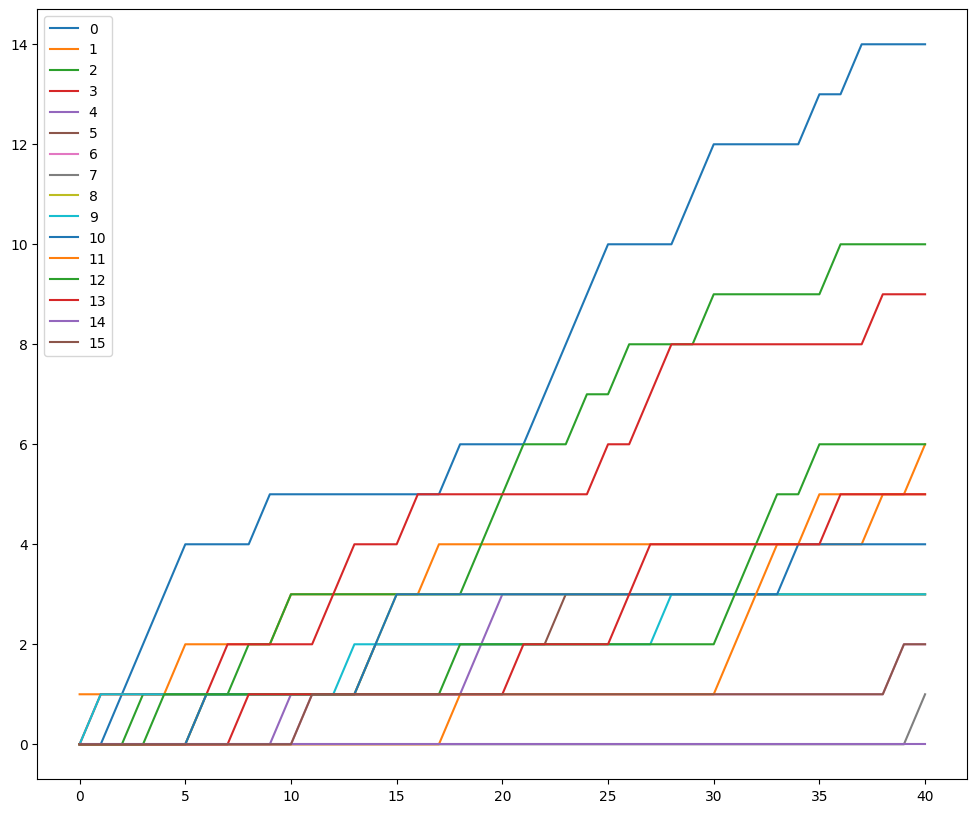

In [137]:
plt.figure(figsize=(12,10))
for agent in sma.agentList:
     plt.plot(sorted(list(agent.history.values())), label=agent.id_number)
plt.legend()
plt.show()

On peut également placer des poids sur les noeuds du graphe, liés par exemple au nombre de fois qu'ils ont eu la balle, puis afficher le graphe avec des intensité de bleus différentes selon ces poids. Cela permet par exemple de vérifier l'hypothèse selon laquelle les agents les plus connectés ont eu plus souvent la balle.

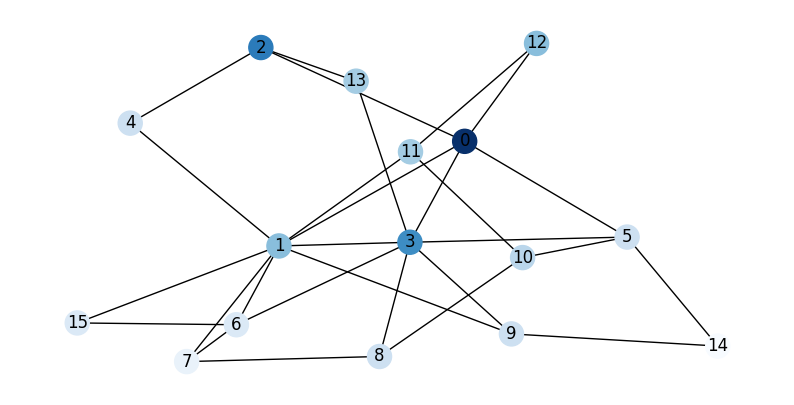

In [138]:
plt.figure(figsize=(10,5))
weights = [agent.history[nb_rounds] for agent in sma.agentList]
nx.draw_networkx(graph, node_color=weights, cmap=plt.cm.Blues)
plt.axis('off')
plt.show()

## Reflexions sur la méthode `decide`

On peut se demander qui contrôle le fait que chaque agent n'effectue qu'une seule action à chaque tick ? Dans cette implémentation : rien ! Un agent peut parfaitement exécuter plusieurs actions durant une prise parole sans que le système n'en sache rien.  En pratique, lors de la conception d'un SMA, deux possibilités s'offrent au développeur pour la gestion de la méthode decide :
1. soit on considère que le SMA n'est qu'un "scheduling system", et qu'il donne uniquement le controle aux agents comme le ferait le système d'exploitation avec des Threads. La methode `decide` exécute les actions et ne renvoie alors rien. De ce fait les agents peuvent éventuellement faire plusieurs actions, mais en contrepartie on respecte strictement le **principe d'autonomie**
2. Soit on considère que l'on s'autorise des actions dans le SMA. La méthode décide devient une fonction qui renvoie l'action à effectuer et c'est le SMA lui même qui l'exécute. Il est de ce fait possible de contrôler les agents, mais l'agent n'est plus vraiment autonome.

Controle des agents ou autonomie des agents, il faut choisir !


# Exercices

## Exercice 1
Cette application permet de lancer plusieurs balles simultanément. Modifiez l'application pour qu'elle s'arrête quand un des agents réussit à avoir deux balles en même temps. Le système affichera alors le nombre d'étapes nécessaires pour parvenir à cette situation.

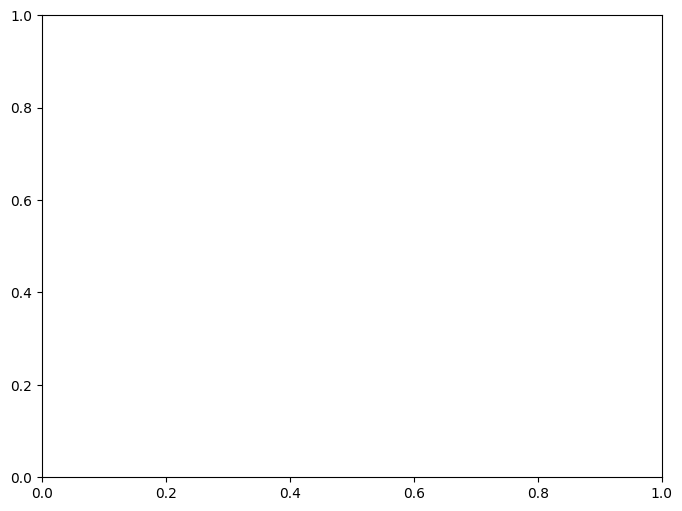

In [139]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class Agent:
    def __init__(self, id_number, accointances):
        self.id_number = id_number
        self.accointances = accointances
        self.balls = []
        self.history = {0: 0}

    def decide(self, tick, sma):
        if tick not in self.history:
            self.history[tick] = self.history[tick-1]
        if self.balls:
            chosen = np.random.choice(self.accointances, 1)[0]
            ball = self.balls.pop(0)
            sma.agentList[chosen].balls.append(ball)
            sma.agentList[chosen].history[tick] = sma.agentList[chosen].history[tick-1] + 1

class SMA:
    def __init__(self, nb_agents, adjacency_matrix):
        self.tick = 0
        self.agentList = []
        for i in range(nb_agents):
            accointances = np.nonzero(adjacency_matrix[i])[0]
            self.agentList.append(Agent(i, accointances))

    def runOnce(self):
        self.tick += 1
        for agent in self.agentList:
            agent.decide(self.tick, self)


nb_agents = 16
graph = nx.barabasi_albert_graph(nb_agents, 2)
matrix = nx.to_numpy_array(graph, nodelist=range(nb_agents))
sma = SMA(nb_agents, matrix)


sma.agentList[0].balls.append("Ball1")
sma.agentList[5].balls.append("Ball2")


pos = nx.spring_layout(graph)


fig, ax = plt.subplots(figsize=(8,6))

def update(frame):
    ax.clear()
    sma.runOnce()

    colors = [len(agent.balls) for agent in sma.agentList]
    nx.draw_networkx(graph, pos=pos, node_color=colors, cmap=plt.cm.Reds, ax=ax, with_labels=True)
    ax.set_title(f"Tick {sma.tick}")
    ax.axis('off')

ani = FuncAnimation(fig, update, frames=30, interval=800, repeat=False)
plt.show()


/usr/local/lib/python3.12/dist-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


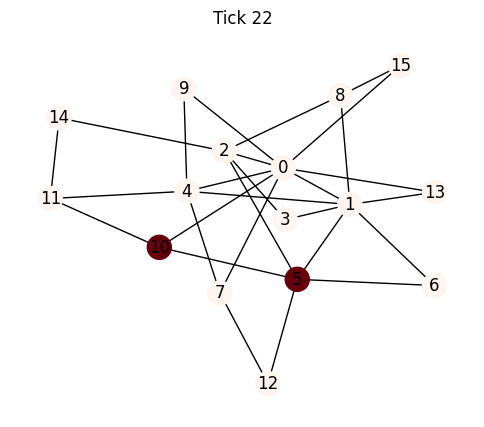

In [140]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(6,5))

def update(frame):
    ax.clear()
    sma.runOnce()
    colors = [len(agent.balls) for agent in sma.agentList]
    nx.draw_networkx(graph, pos=pos, node_color=colors, cmap=plt.cm.Reds, ax=ax, with_labels=True)
    ax.set_title(f"Tick {sma.tick}")
    ax.axis('off')

ani = FuncAnimation(fig, update, frames=20, interval=800, repeat=False)
HTML(ani.to_jshtml())


## Exercice 2

En s'appuyant sur l'exercice 1, créez une méthode permettant pour un type de réseau de réaliser `n` expériences consécutives. Les valeurs de `n` et du réseau seront passés en paramètre. La méthode renverra le nombre d'étapes moyen qu'il a fallu réaliser pour arriver à l'arrêt (un agent avec 2 balles).

Testez cette méthode avec 4 types de réseaux différents (`nx.complete_graph(nb_agents)`, `nx.erdos_renyi_graph(nb_agents,0.1)`,`nx.cycle_graph(nb_agents)`,`nx.random_regular_graph(3,nb_agents)`) et montrez l'influence du réseau sur le nombre d'étapes nécessaires.

In [141]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# --- Agent et SMA ---
class Agent:
    def __init__(self, id_number, accointances):
        self.id_number = id_number
        self.accointances = accointances
        self.balls = []
        self.history = {0: 0}

    def decide(self, tick, sma):
        if tick not in self.history:
            self.history[tick] = self.history[tick-1]
        if self.balls and len(self.accointances) > 0:   # ✅ Vérification ajoutée
            chosen = np.random.choice(self.accointances, 1)[0]
            ball = self.balls.pop(0)
            sma.agentList[chosen].balls.append(ball)
            sma.agentList[chosen].history[tick] = sma.agentList[chosen].history[tick-1] + 1

class SMA:
    def __init__(self, nb_agents, adjacency_matrix):
        self.tick = 0
        self.agentList = []
        for i in range(nb_agents):
            accointances = np.nonzero(adjacency_matrix[i])[0]
            self.agentList.append(Agent(i, accointances))

    def runUntilStop(self):
        while True:
            self.tick += 1
            for agent in self.agentList:
                agent.decide(self.tick, self)
            for agent in self.agentList:
                if len(agent.balls) >= 2:
                    return self.tick

# --- Fonction pour générer un graphe connexe ---
def connected_graph(generator_func, nb_agents, *args):
    graph = generator_func(nb_agents, *args)
    while not nx.is_connected(graph):   # ✅ Boucle jusqu’à obtenir un graphe connexe
        graph = generator_func(nb_agents, *args)
    return graph

# --- Fonction d’expérience ---
def experiment(nb_agents, graph_func, n=10, *args):
    steps = []
    for _ in range(n):
        graph = connected_graph(graph_func, nb_agents, *args)
        matrix = nx.to_numpy_array(graph, nodelist=range(nb_agents))
        sma = SMA(nb_agents, matrix)

        # Donner deux balles à des agents distincts
        sma.agentList[0].balls.append("Ball1")
        sma.agentList[1].balls.append("Ball2")

        ticks = sma.runUntilStop()
        steps.append(ticks)
    return np.mean(steps)

# --- Tests avec différents graphes ---
nb_agents = 16
n_exp = 30  # nombre d’expériences par type de graphe

results = {
    "Complete": experiment(nb_agents, nx.complete_graph, n_exp),
    "Erdos-Renyi": experiment(nb_agents, nx.erdos_renyi_graph, n_exp, 0.1),
    "Cycle": experiment(nb_agents, nx.cycle_graph, n_exp),
    "Random Regular": experiment(nb_agents, nx.random_regular_graph, n_exp, 3)
}

print("Résultats (moyenne des ticks sur", n_exp, "expériences):")
for net, val in results.items():
    print(f"{net}: {val:.2f} ticks")

# --- Visualisation comparative ---
plt.figure(figsize=(8,6))
plt.bar(results.keys(), results.values(), color=['blue','green','orange','red'])
plt.ylabel("Nombre moyen de ticks")
plt.title(f"Influence du type de réseau sur {n_exp} expériences (nb_agents={nb_agents})")
plt.show()


NetworkXError: the 0 <= d < n inequality must be satisfied

## Exercice 3
Sur le même principe que précédemment, on souhaite réaliser un système dans lequel tous les agents se connaissent, et chaque agent possède un certain nombre d'unités de richesse (`wealth`). Initalement, tous sont parfaitement égaux et ont tous une richesse de 5. Chaque fois qu'un agent a la parole (donnée de manière équitable), l'agent choisit au hasard un autre agent et lui donne 1 richesse (s'il n'est pas à 0 bien sûr). Réalisez `n` tours de parole et tracez ensuite un diagramme de type `bar` indiquant la richesse par agent, ainsi que l'histogramme de distribution des richesses.

# Exercice 4
On souhaite maintenant que les agents aient une préférence pour leur classe sociale, donc ici pour les agents qui ont grosso-modo la même richesse qu'eux. Cette fois la richesse est tirée uniformément entre 1 et 10. Faites en sorte que les dons soient toujours faits avec un agent pris aléatoirement, mais cette fois ci, avec une probabilité proportionnelle à l'inverse de l'écart à son propre wealth. Dans le cas où l'écart est nul (ce qui impliquerait une division par zéro), on pourra fixer la probabilité à 2 (ils ont alors plus de chances d'être pris quand ils sont égaux, que quand ils ont 1 de différence). Retestez ensuite l'évolution de l'histogramme des richesses.



*Aide: Il s'agit ici de programmer une sorte de "roue de la fortune" (pour info la methode `Choice` de `numpy` permet d'indiquer des distributions de probas) dans le processus de décision de l'agent : au moment de sa décision, l'agent calcule une map avec comme clé l'un des agents et comme valeur l'inverse de l'écart à son propre wealth. Il fait ensuite la somme totale des valeurs obtenues et tire un nombre aléatoire entre 0 et ce total. Il reparcourt son tableau en cumulant les valeurs à concurrence du nombre tiré. L'agent sur lequel il tombe correspond à celui à qui il fait un don.*

# Bibliographie

Philippe Mathieu, Yann Secq.
Environment Updating and Agent Scheduling Policies in Agent-based Simulators.
ICAART Conference, 2012, pp 170-175

Philippe Mathieu, Sébastien Picault, Yann Secq.
Design Patterns for Environments in Multi-agent Simulations.
PRIMA Conference, 2015, pp 678-686

Philippe Mathieu, Gildas Morvan, Sébastien Picault.
Multi-level agent-based simulations: Four design patterns.
Journal of Simulation Modelling Practice and Theory, Janv 2018
